In [1]:
import pandas as p
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plotter
import seaborn as sns
import numpy as n
from scipy.stats import percentileofscore

In [14]:
input_directory1 = "C:/Users/BLAHBLAHBLAH/Desktop/tweets_from_maddow_followers_cleaned.csv"
input_directory2 = "C:/Users/BLAHBLAHBLAH/Desktop/tweets_from_seanhannity_followers_cleaned.csv"
input_directory_random = "C:/Users/BLAHBLAHBLAH/Desktop/tweets_from_followers_random_cleaned.csv"
group1 = "Democrats"
group2 = "Republicans"

In [3]:
data_a = p.read_csv(input_directory1, dtype = {'tweets': str})
data_a.head(5)

,date,tweets,name
0,2017-02-11,rayban sunglasses valentines day specials,amaldiallo
1,2014-02-13,you rock,amaldiallo
2,2012-02-23,weird mood,amaldiallo
3,2020-05-19,some of us depend on the drug to live a normal...,taheownwoman
4,2020-05-19,those of us who depend on the drug to live a n...,taheownwoman


In [4]:
data_a0 = data_a
data_a0.tweets = data_a.tweets.apply(str)
data_a0.head(5)

,date,tweets,name
0,2017-02-11,rayban sunglasses valentines day specials,amaldiallo
1,2014-02-13,you rock,amaldiallo
2,2012-02-23,weird mood,amaldiallo
3,2020-05-19,some of us depend on the drug to live a normal...,taheownwoman
4,2020-05-19,those of us who depend on the drug to live a n...,taheownwoman


In [5]:
data_a1 = data_a0
data_a1['polarity'] = data_a0.tweets.apply(
    lambda x: TextBlob(x).sentiment.polarity
)
data_a1['subjectivity'] = data_a0.tweets.apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)
data_a1.head(5)

,date,tweets,name,polarity,subjectivity
0,2017-02-11,rayban sunglasses valentines day specials,amaldiallo,0.000000,0.000
1,2014-02-13,you rock,amaldiallo,0.000000,0.000
2,2012-02-23,weird mood,amaldiallo,-0.500000,1.000
3,2020-05-19,some of us depend on the drug to live a normal...,taheownwoman,0.143182,0.575
4,2020-05-19,those of us who depend on the drug to live a n...,taheownwoman,0.143182,0.575


In [6]:
names_adequate_sample_size = data_a1.groupby(['name']).count().reset_index().query(
    'polarity == 25'
).name
names_adequate_sample_size = set(names_adequate_sample_size.tolist())
data_a2 = data_a1.groupby(['name']).mean().reset_index()
data_a2 = data_a2[
    data_a2.name.isin(names_adequate_sample_size)
]
data_a2.head(5)

,name,polarity,subjectivity
2,0mar_pacheco,0.007514,0.364583
3,1025Kimmysue,0.064778,0.405786
4,1101adityam,0.188933,0.458317
5,12Trends,0.183087,0.453103
6,188190DHMH,-0.091000,0.211611


In [8]:
polarity_a = data_a2.polarity.median()
subjectivity_a = data_a2.subjectivity.median()

In [9]:
#maddow
print(polarity_a)
print(subjectivity_a)

0.05915454545454546
0.30641818181818176


In [11]:
data_b = p.read_csv(input_directory2, dtype = {'tweets': str})
data_b0 = data_b
data_b0.tweets = data_b.tweets.apply(str)
data_b1 = data_b0
data_b1['polarity'] = data_b0.tweets.apply(
    lambda x: TextBlob(x).sentiment.polarity
)
data_b1['subjectivity'] = data_b0.tweets.apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)
names_adequate_sample_size = data_b1.groupby(['name']).count().reset_index().query(
    'polarity == 25'
).name
names_adequate_sample_size = set(names_adequate_sample_size.tolist())
data_b2 = data_b1.groupby(['name']).mean().reset_index()
data_b2 = data_b2[
    data_b2.name.isin(names_adequate_sample_size)
]
data_b2.head(5)
polarity_b = data_b2.polarity.median()
subjectivity_b = data_b2.subjectivity.median()

#seanhannity
print(polarity_b)
print(subjectivity_b)

0.06309404761904763
0.28327409812409815


In [15]:
# random sample of general population
data_random = p.read_csv(input_directory_random, dtype = {'tweets': str})
data_random0 = data_random
data_random0.tweets = data_random.tweets.apply(str)
data_random1 = data_random0
data_random1['polarity'] = data_random0.tweets.apply(
    lambda x: TextBlob(x).sentiment.polarity
)
data_random1['subjectivity'] = data_random0.tweets.apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)
names_adequate_sample_size = data_random1.groupby(['name']).count().reset_index().query(
    'polarity == 25'
).name
names_adequate_sample_size = set(names_adequate_sample_size.tolist())
data_random2 = data_random1.groupby(['name']).mean().reset_index()
data_random2 = data_random2[
    data_random2.name.isin(names_adequate_sample_size)
]
data_random2.head(5)


,name,polarity,subjectivity
0,10AJMcCarron,0.273778,0.353778
1,12thMan,0.147791,0.238190
2,80miles,0.061317,0.287095
3,911onFOX,0.168762,0.194762
4,A24,0.199066,0.505237


Democrats' Sentiment Percentile:  15.23%
Republicans' Sentiment Percentile:  16.83%


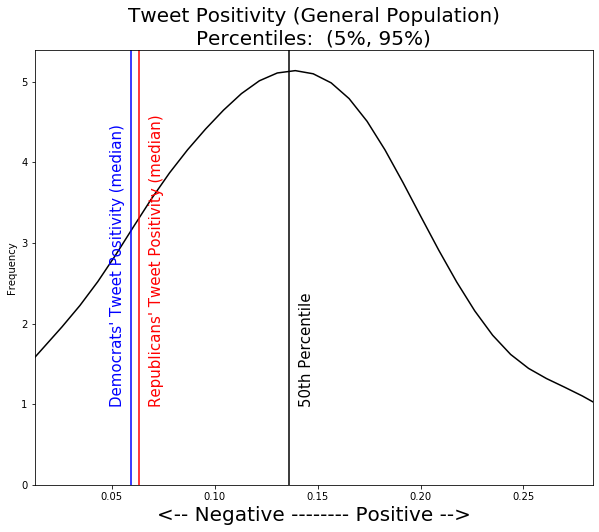

In [21]:
# Visualize age distribution by target value.
plotter.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_random2.polarity, legend = False, color = "black")

# Labeling of plot
plotter.xlabel('<-- Negative -------- Positive -->', fontsize = 20)
plotter.ylabel('Frequency')
plotter.title('Tweet Positivity (General Population)\n\
                Percentiles:  (5%, 95%)                ', fontsize = 20);

plotter.xlim(
    n.percentile(data_random2.polarity, 5),
    n.percentile(data_random2.polarity, 95)
)

plotter.axvline(x = polarity_a, color = "blue")
plotter.text(polarity_a - .01, 1, 'Democrats\' Tweet Positivity (median)', rotation = 90, size = 15, color = "blue")
plotter.axvline(x = polarity_b, color = "red")
plotter.text(polarity_b + .005, 1, 'Republicans\' Tweet Positivity (median)', rotation = 90, size = 15, color = 'red')
plotter.axvline(x = n.percentile(data_random2.polarity, 50), color = "black")
plotter.text(n.percentile(data_random2.polarity, 50) + .005, 1, '50th Percentile', rotation = 90, size = 15)

print(
    "Democrats' Sentiment Percentile:  ",
    round(percentileofscore(data_random2.polarity, polarity_a), 2),
    "%",
    sep = ""
)
print(
    "Republicans' Sentiment Percentile:  ",
    round(percentileofscore(data_random2.polarity, polarity_b), 2),
    "%",
    sep = ""
)


Democrats' Sentiment Percentile:  44.29%
Republicans' Sentiment Percentile:  33.47%


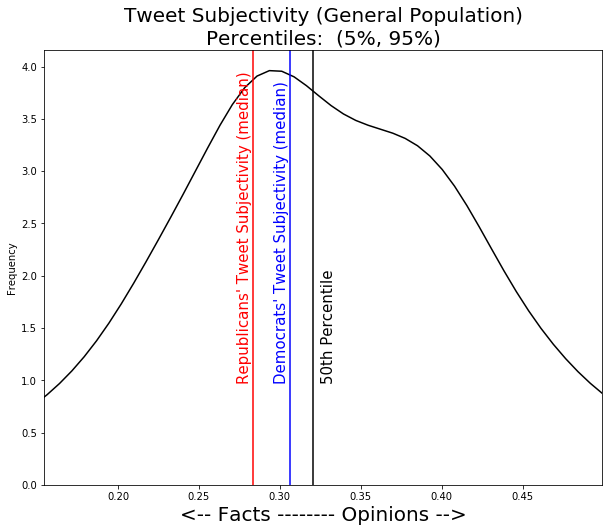

In [22]:
# Visualize age distribution by target value.
plotter.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(data_random2.subjectivity, legend = False, color = "black")

# Labeling of plot
plotter.ylabel('Frequency')
plotter.xlabel('<-- Facts -------- Opinions -->', fontsize = 20)
plotter.title('Tweet Subjectivity (General Population)\n\
                Percentiles:  (5%, 95%)                ', fontsize = 20);

plotter.xlim(
    n.percentile(data_random2.subjectivity, 5),
    n.percentile(data_random2.subjectivity, 95)
)

plotter.axvline(x = subjectivity_a, color = "blue")
plotter.text(subjectivity_a - .01, 1, 'Democrats\' Tweet Subjectivity (median)', rotation = 90, size = 15, color = "blue")
plotter.axvline(x = subjectivity_b, color = "red")
plotter.text(subjectivity_b - .01, 1, 'Republicans\' Tweet Subjectivity (median)', rotation = 90, size = 15, color = 'red')
plotter.axvline(x = n.percentile(data_random2.subjectivity, 50), color = "black")
plotter.text(n.percentile(data_random2.subjectivity, 50) + .005, 1, '50th Percentile', rotation = 90, size = 15)

print(
    "Democrats' Sentiment Percentile:  ",
    round(percentileofscore(data_random2.subjectivity, subjectivity_a), 2),
    "%",
    sep = ""
)
print(
    "Republicans' Sentiment Percentile:  ",
    round(percentileofscore(data_random2.subjectivity, subjectivity_b), 2),
    "%",
    sep = ""
)
